# London Underground Exit Data

The aim of this report is to analyse London Underground exit data from 2017 (relating to a weekday), which was generated by Transport for London. Specifically, it will look at travel patterns of exits in relation to the morning and evening peaks. These are of particular interest, as people travel to and from work during these times, accounting for a large amount of travel throughout a day across the network. Stations will also be classified into categories based on their exit activities, and a sample of these results will be discussed.

 1. Section 1: Calculating Morning and Evening Peak Proportions
     1. Calculating AM and PM peak counts
     1. Determining AM and PM peak proportions
 
 2. Section 2: Plotting and Analysing Distributions
     1. Describing the data and plotting histograms
     1. Analysing the distributions
      
 3. Section 3: Classification of Stations
     1. Determining the peak proportion ratio
     1. Setting threshold values and determining classification
     1. Discussion of results
     





## Section 1: Calculating Morning and Evening Peak Proportions

In order to determine the morning and evening peak proportions, data relating to exits during these hours was selected. In this section, we will first calculate the total number of exits in the morning and in the evening, and then determine the respective proportions. The morning (AM) and evening (PM) periods are defined as below:

    - The AM period refers to the exits for a station between 7am - 9am
    - The PM period refers to the exits for a station between 4pm - 6pm

### 1.1: Calculating AM and PM peak counts

The hour columns related to the AM and PM peak counts were selected, their values summed and subsequently two new columns ("AM_Peak_Count" and "PM_Peak_Count") were added to a dataframe. A summary of the stations and their respective peak morning and evening counts can be seen below:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

exits = pd.read_csv('hourlyExits.csv', index_col='Station')

AM_hours = exits.loc[:,['H07', 'H08', 'H09']]
PM_hours = exits.loc[:,['H16', 'H17', 'H18']]

peak_counts = pd.DataFrame().assign(AM_Peak_Count = AM_hours.apply(sum, axis=1), PM_Peak_Count = PM_hours.apply(sum, axis=1))

peak_counts

,AM_Peak_Count,PM_Peak_Count
Station,,
Acton Town,1970,2628
Aldgate,7408,2992
Aldgate East,7618,3803
Alperton,856,1847
Amersham,424,1465
...,...,...
Wimbledon Park,497,1114
Wood Green,2165,6494
Wood Lane,1798,1766


### 1.2: Determining AM and PM peak proportions

To enable fair comparisons between the morning and evening peaks of stations, a proportional measure is required. Therefore, the total daily number of exits were determined for each station, by adding the exits across all hours for each station. The respective peak proportions were then calculated by dividing the AM and PM peak counts by the total daily exits. Attributes were created for the "Daily_Total", "AM_Peak_Proportion" and "PM_Peak Proportion" which were added to the dataframe. This is summarised below:

In [2]:
totals = peak_counts.assign(Daily_Total = exits.apply(sum, axis=1))

def determineProportionAM(row):
    total = row['Daily_Total']
    return row['AM_Peak_Count'] / total

def determineProportionPM(row):
    total = row['Daily_Total']
    return row['PM_Peak_Count'] / total

totals_proportion = totals.assign(AM_Peak_Proportion = totals.apply(determineProportionAM, axis=1), PM_Peak_Proportion = totals.apply(determineProportionPM, axis=1))

totals_proportion

,AM_Peak_Count,PM_Peak_Count,Daily_Total,AM_Peak_Proportion,PM_Peak_Proportion
Station,,,,,
Acton Town,1970,2628,9362,0.210425,0.280709
Aldgate,7408,2992,16136,0.459098,0.185424
Aldgate East,7618,3803,21206,0.359238,0.179336
Alperton,856,1847,5118,0.167253,0.360883
Amersham,424,1465,3905,0.108579,0.375160
...,...,...,...,...,...
Wimbledon Park,497,1114,3296,0.150789,0.337985
Wood Green,2165,6494,18989,0.114013,0.341987
Wood Lane,1798,1766,6610,0.272012,0.267171


## Section 2: Plotting and Analysing Distributions

This section looks at the selected data in greater detail, and aims to specifically describe the distribution of data amongst the AM and PM peaks.

### 2.1: Describing the data and plotting histograms

Statistics of the distributions have been generated (using an in-built function) on the table of data from the previous section. In addition, histograms indicating the number of stations within certain ranges of the daily proportional morning and evening activities were created to facilitate analysis in the next subsection. Note that the x- and y-axes of the histograms share the same scales to enable fairer comparisons.


In [3]:
totals_proportion.describe()

,AM_Peak_Count,PM_Peak_Count,Daily_Total,AM_Peak_Proportion,PM_Peak_Proportion
count,268.000000,268.000000,268.000000,268.000000,268.000000
mean,4549.768657,4477.555970,17194.477612,0.207132,0.298750
std,8181.784059,6276.463316,23480.190142,0.122161,0.087724
min,27.000000,239.000000,596.000000,0.045302,0.084630
25%,677.500000,1471.750000,4889.500000,0.116120,0.240947
50%,1517.000000,2622.000000,9210.000000,0.169378,0.307397
75%,4315.250000,4707.750000,19999.500000,0.266443,0.361596
max,61116.000000,59486.000000,149258.000000,0.630427,0.496079


Text(0, 0.5, 'Number of Stations')

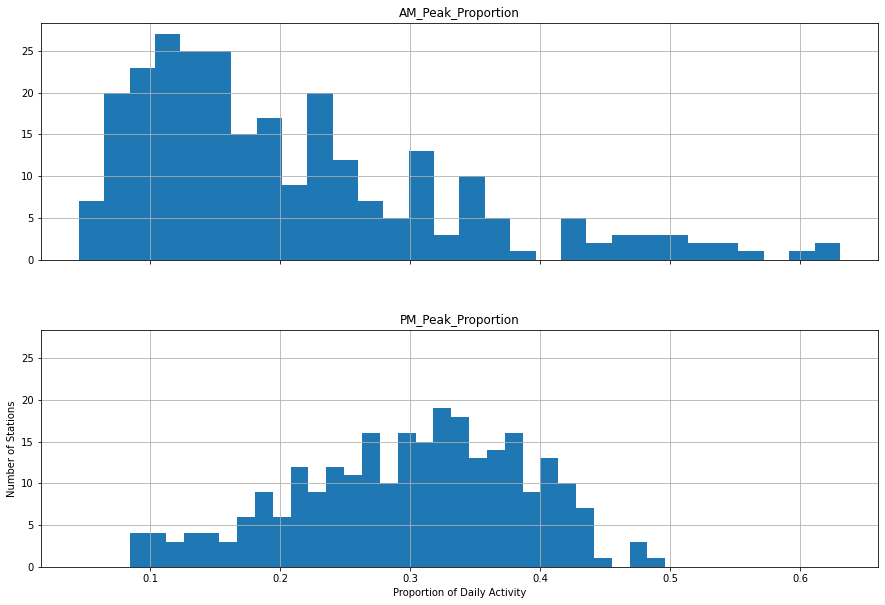

In [4]:
axes = totals_proportion.hist(column=['AM_Peak_Proportion', 'PM_Peak_Proportion'], bins=30, figsize=(15,10), layout=(2,1), sharey=True, sharex=True)
plt.xlabel('Proportion of Daily Activity')
plt.ylabel('Number of Stations')

### 2.2: Analysing the distributions

Looking at the data for the AM peak proportions, the mean (0.21) is greater than the median (0.17) which suggests a positive skew. In contrast, the mean (0.30) for the PM peak proportions is approximately equal to the median (0.31) which suggests an almost symmetric distribution. This is supported by the distribution of the quartiles, in particular the lower quartile (which separates the bottom 25% of stations) and the upper quartile (which separates the top 25% of stations). The median of the AM peak proportion is much closer to the lower quartile (0.12) than the upper quartile (0.27). Whereas for the PM peak proportions, the lower (0.24) and upper quartiles (0.36) are approximately equidistant from the median. This can be further consolidated by the visual distribution of the histograms.

The AM peak proportion histogram shows that a greater proportion of stations have a relatively small proportion of their daily total exits in the morning. This suggests that fewer people are leaving these stations in the morning compared to other times of day. Whereas, the PM peak proportion histogram illustrates that a greater proportion of stations have a relatively higher proportion of exits in the evening. More people are leaving these stations in the evening compared to the rest of the day.

The ranges (max-min) for the AM and PM peak proportions are approximately 0.59 and 0.4 respectively. The range of the AM peak proportion is greater, spanning further out at both extremes compared to the PM peak proportions. There are a few stations which are less or more particularly exited in the morning. On the other hand, the PM peak proportions are less spread out, so in general a larger number of stations would experience similar exit activity at this time of day. This suggests that the distribution of exits in the morning is more diverse (more people are exiting from a greater variety of stations) compared to that in the evening.

Overall, this may correlate with working patterns; people travel to places of work in the morning to more stations which subsequently leads to greater spread of activity. This can be compared with the evening travel to residential areas which have similarly higher proportions of exits.

## Section 3: Classification of Stations

The aim of this section is an attempt to classify all stations into three categories: those that are mainly used for "Work", are "Residential" or "Other" and discuss whether or not this classification returns expected results. It will also detail how these classifications were made.

### 3.1: Determining the peak proportion ratio

In order to classify the stations based on their relative AM and PM peak proportions, an attribute was introduced to the dataframe for the "Peak_Proportion_Ratio". This is the ratio of the AM peak proportion to the PM peak proportion (calculated by dividing the AM peak proportion by the PM peak proportion), enabling comparisons of the exits that these stations had during peak times to be made.

In [5]:
def determineProportionRatio(row):
    return row['AM_Peak_Proportion'] / row['PM_Peak_Proportion']

totals_proportion_ratio = totals_proportion.assign(Peak_Proportion_Ratio = totals_proportion.apply(determineProportionRatio, axis=1))
totals_proportion_ratio

,AM_Peak_Count,PM_Peak_Count,Daily_Total,AM_Peak_Proportion,PM_Peak_Proportion,Peak_Proportion_Ratio
Station,,,,,,
Acton Town,1970,2628,9362,0.210425,0.280709,0.749619
Aldgate,7408,2992,16136,0.459098,0.185424,2.475936
Aldgate East,7618,3803,21206,0.359238,0.179336,2.003155
Alperton,856,1847,5118,0.167253,0.360883,0.463454
Amersham,424,1465,3905,0.108579,0.375160,0.289420
...,...,...,...,...,...,...
Wimbledon Park,497,1114,3296,0.150789,0.337985,0.446140
Wood Green,2165,6494,18989,0.114013,0.341987,0.333385
Wood Lane,1798,1766,6610,0.272012,0.267171,1.018120


Similarly to the previous section, the below table additionally summarises the statistical data for this new column. This data was used to define "thresholds" using upper and lower quartiles, which will be explained in the following subsection.

In [6]:
totals_proportion_ratio.describe()

,AM_Peak_Count,PM_Peak_Count,Daily_Total,AM_Peak_Proportion,PM_Peak_Proportion,Peak_Proportion_Ratio
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,4549.768657,4477.555970,17194.477612,0.207132,0.298750,0.966229
std,8181.784059,6276.463316,23480.190142,0.122161,0.087724,1.148915
min,27.000000,239.000000,596.000000,0.045302,0.084630,0.108634
25%,677.500000,1471.750000,4889.500000,0.116120,0.240947,0.327530
50%,1517.000000,2622.000000,9210.000000,0.169378,0.307397,0.555720
75%,4315.250000,4707.750000,19999.500000,0.266443,0.361596,1.050702
max,61116.000000,59486.000000,149258.000000,0.630427,0.496079,7.325050


### 3.2: Setting threshold values and determining classification

A station that has relatively more exits in the morning would be classified as a "Work" station, whereas those with more exits in the evening would be "Residential". The remaining stations with  similar morning and evening activity would be classified as "Other". Based on this, thresholds were defined (using the statistical data from the previous section) in order to enable such classifications to be made.

The upper quartile of the peak proportion ratio would allow us to obtain the top 25% of stations with the significantly more exits in the morning compared to the evening. Similarly, the lower quartile separating the bottom 25% of stations would find those with significantly more exits in the evening (or significantly fewer exits in the morning). The thresholds were defined as follows:

    - The upper quartile of the peak proportion ratio (AM Peak/PM Peak) is 1.05 (to 2 d.p.). This is the threshold for "Work".
    - The lower quartile of the peak proportion ratio (AM Peak/PM Peak) is 0.33 (to 2 d.p.). This is the threshold for "Residential".
    - Everything in between (the interquartile range) should have approximately equal activity in AM/PM and will be classfied as "Other".
    
Any stations with a peak proportion ratio of greater than or equal to 1.05 were classified as "Work" stations. Stations with a peak proportion ratio of less than or equal to 0.33 were classified as "Residential". The remaining stations were classfied as "Other". A new attribute named "Classification" was added to the dataframe to contain this data. A summary table with all stations and their classification can be seen below:


In [7]:
def determineClassification(row):
    if (row.Peak_Proportion_Ratio) >= 1.05:
        return "Work"
    elif (row.Peak_Proportion_Ratio) <= 0.33:
        return "Residential"
    else:
        return "Other"
    
totals_proportion_ratio_classified = totals_proportion_ratio.assign(Classification = totals_proportion_ratio.apply(determineClassification, axis=1))

totals_proportion_ratio_classified

,AM_Peak_Count,PM_Peak_Count,Daily_Total,AM_Peak_Proportion,PM_Peak_Proportion,Peak_Proportion_Ratio,Classification
Station,,,,,,,
Acton Town,1970,2628,9362,0.210425,0.280709,0.749619,Other
Aldgate,7408,2992,16136,0.459098,0.185424,2.475936,Work
Aldgate East,7618,3803,21206,0.359238,0.179336,2.003155,Work
Alperton,856,1847,5118,0.167253,0.360883,0.463454,Other
Amersham,424,1465,3905,0.108579,0.375160,0.289420,Residential
...,...,...,...,...,...,...,...
Wimbledon Park,497,1114,3296,0.150789,0.337985,0.446140,Other
Wood Green,2165,6494,18989,0.114013,0.341987,0.333385,Other
Wood Lane,1798,1766,6610,0.272012,0.267171,1.018120,Other


### 3.3: Discussion of results

For the purpose of this discussion, a sample of stations on the Northern Line (Archway, Balham, Embankment, Goodge Street, Highgate, High Barnet, Leicester Square, Morden, South Wimbledon, Tottenham Court Road, Warren Street) were selected. This sample contains stations situated at various points across the line (passing through different areas of London), so we could expect at least one station to fit within each category defined above. The results of this classification can be seen below:

In [8]:
df_NorthernLine = totals_proportion_ratio_classified.loc[['Archway', 'Balham', 'Embankment', 'Goodge Street', 'Highgate', 'High Barnet', 'Leicester Square','Morden', 'South Wimbledon', 'Tottenham Court Road', 'Warren Street']]
    
df_NorthernLine

,AM_Peak_Count,PM_Peak_Count,Daily_Total,AM_Peak_Proportion,PM_Peak_Proportion,Peak_Proportion_Ratio,Classification
Station,,,,,,,
Archway,2190,4106,13935,0.157158,0.294654,0.533366,Other
Balham,2637,7635,22128,0.119170,0.345038,0.345383,Other
Embankment,10692,8829,33781,0.316509,0.261360,1.211009,Work
Goodge Street,5374,1949,12817,0.419287,0.152064,2.757311,Work
Highgate,893,3170,8921,0.100101,0.355341,0.281703,Residential
High Barnet,987,2362,6843,0.144235,0.345170,0.417866,Other
Leicester Square,8952,12915,47772,0.187390,0.270347,0.693148,Other
Morden,1550,5955,15680,0.098852,0.379783,0.260285,Residential
South Wimbledon,1335,2198,7197,0.185494,0.305405,0.607370,Other


Enbankment, Goodge Street, Tottenham Court Road and Warren Street have been classified as "Work" stations. These results align  with expectations; all stations are in the central region of London. Furthermore, they are situated close to places of interest, offices, universities and major hospitals. The only exception to this is Leicester Square (classified as "Other"), which appears to be further away from places of work, such as offices and universities. The relatively fewer exits in the morning could be explained as there are more tourist and leisure locations close to the station.


Morden and Highgate are classified as "Residential" stations. Morden is situated at the end of the line, so the result is expected. Likewise, Highgate is situated close to the end of the line. Archway, Balham, High Barnet and South Wimbledon are classified as "Other" stations. They are all are situated close to the end of the line, so we could expect them to be more "Residential" areas. The differences in results could be explained by more specific individual factors. For example, although High Barnet is situated at the very end of the line, it is situated close to a hospital which is also a place of work.
